In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IPL 2022 Batters.csv')

Looking for empty cells

In [3]:
null_values = df.isnull().sum()

In [4]:
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
dtype: int64


In [5]:
dash_values = (df == '-').sum()

In [6]:
print("\nDash Values in Each Column:")
print(dash_values)


Dash Values in Each Column:
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       8
BF        0
SR        0
100       0
50        0
4s        0
dtype: int64


In [7]:
#replacing - with na and then finally with mean
df = df.replace('-', pd.NA)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

In [8]:
#checking again for - values
dash_values = (df == '-').sum()
print("\nDash Values in Each Column:")
print(dash_values)



Dash Values in Each Column:
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
dtype: int64


working with matplotlib

In [9]:
import matplotlib.pyplot as plt

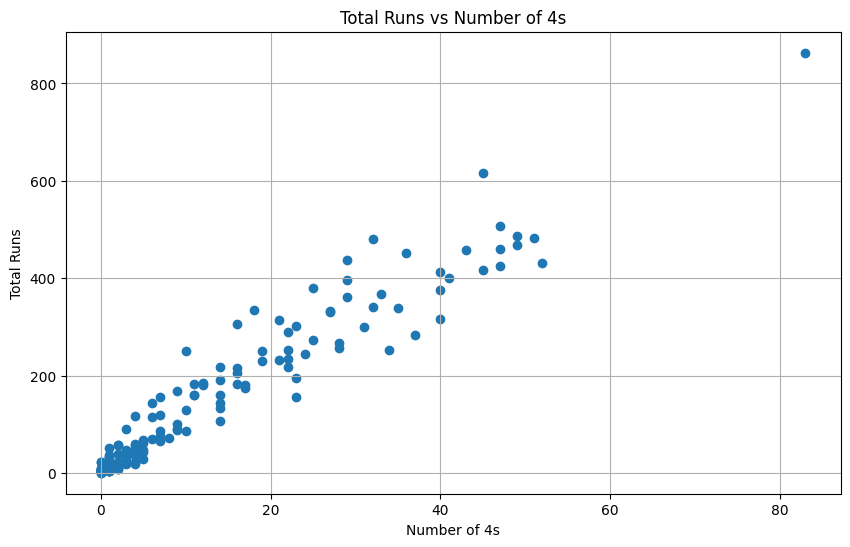

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['4s'], df['Runs'])
plt.title('Total Runs vs Number of 4s')
plt.xlabel('Number of 4s')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

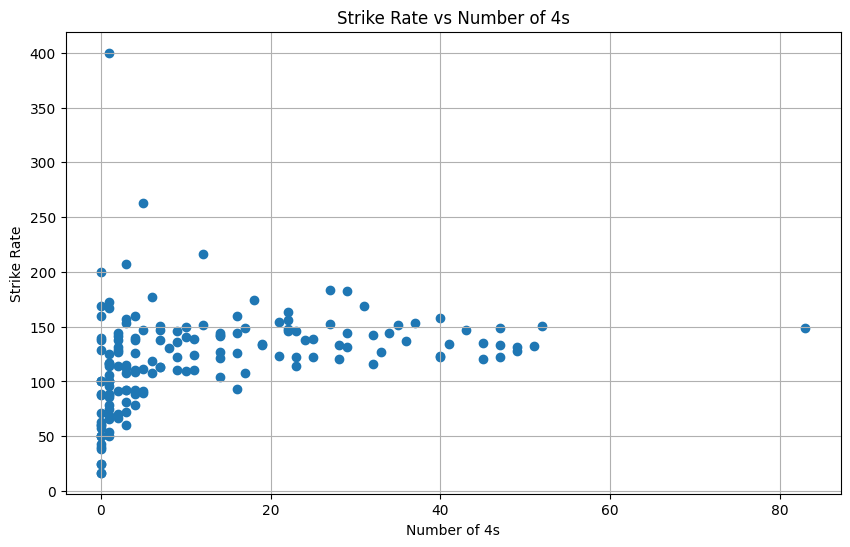

In [11]:
#second graph
plt.figure(figsize=(10, 6))
plt.scatter(df['4s'], df['SR'])
plt.title('Strike Rate vs Number of 4s')
plt.xlabel('Number of 4s')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()

PERFORMING LINEAR REGRESSION ON THE DATA OF 4s

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X = df[['4s']]
y = df['Runs']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [15]:
# Creating a linear regression model
model = LinearRegression()

In [16]:
# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

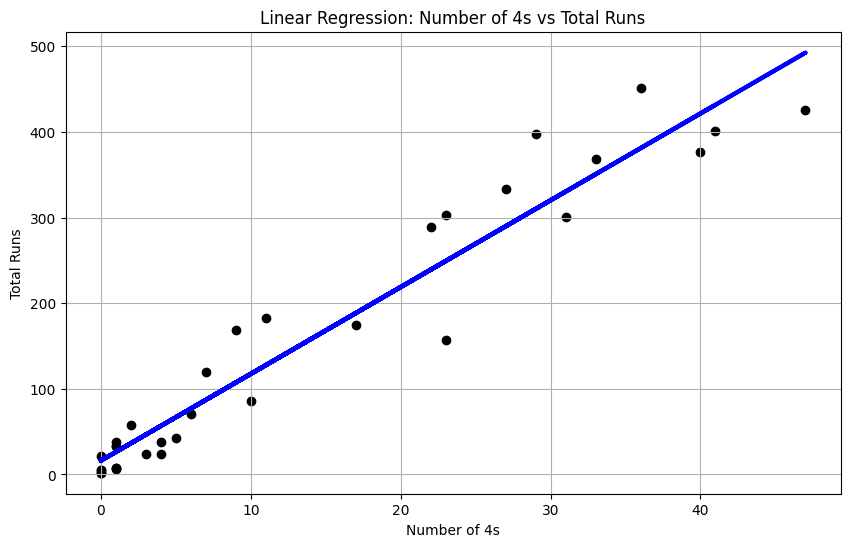

In [18]:
# Visualizing the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Number of 4s vs Total Runs')
plt.xlabel('Number of 4s')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

In [19]:
# printing the errors
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Train Data:", mse_train)
print("Mean Squared Error on Test Data:", mse_test)

Mean Squared Error on Train Data: 1948.3981295498993
Mean Squared Error on Test Data: 1544.9672527112943
